# Setup

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import signal

# Setup the Daily data

Load the daily flow series, index by date and add some other columns for later use. 

Add a column for *WaterYear* which starts on 1st October and runs to 31st September the following year.

In [85]:
daily = pd.read_csv("daily.csv")

daily['Date']=pd.to_datetime(daily['Date'],format="%d/%m/%Y")
daily=daily.set_index(pd.DatetimeIndex(daily['Date']))
daily=daily.drop(['Date'],axis=1)

daily['Year']=daily.index.year
daily['MonthNo']=daily.index.month
daily['Day']=daily.index.day
daily['MonthId']=daily['Year']+daily['MonthNo']/100
daily['WaterYear']=daily.apply((lambda x: (x['Year'] if x['MonthNo']>=10 else x['Year']-1)),axis=1)

daily.head(3)

,Flow,Year,MonthNo,Day,MonthId,WaterYear
Date,,,,,,
1924-10-01,111,1924,10,1,1924.1,1924.0
1924-10-02,111,1924,10,2,1924.1,1924.0
1924-10-03,111,1924,10,3,1924.1,1924.0


# Setup the Monthly Data

Load the monthly data, set the index and add additional columns for later use.

In [111]:
monthly = pd.read_csv("monthly.csv")
monthly['MonthId']=monthly['Year']+monthly['MonthNo']/100
monthly=monthly.set_index(pd.Index(monthly['MonthId']))
monthly=monthly.drop(['MonthId'],axis=1)

monthly['MonthDecimal']=monthly['Year']+monthly['MonthNo']/12
monthly['WaterYear']=monthly.apply((lambda x: (x['Year'] if x['MonthNo']>=10 else x['Year']-1)),axis=1)
monthly['WaterMonth']=monthly.apply((lambda x: (x['MonthNo']-9 if x['MonthNo']>=10 else x['MonthNo']+3)),axis=1)

monthly

,Year,MonthNo,MonthName,Energy,MonthDecimal,WaterYear,WaterMonth
MonthId,,,,,,,
1924.10,1924,10,Oct,0.0,1924.833333,1924,1
1924.11,1924,11,Nov,7.7,1924.916667,1924,2
1924.12,1924,12,Dec,24.3,1925.000000,1924,3
1925.01,1925,1,Jan,61.8,1925.083333,1924,4
1925.02,1925,2,Feb,109.5,1925.166667,1924,5
...,...,...,...,...,...,...,...
2016.05,2016,5,May,139.0,2016.416667,2015,8
2016.06,2016,6,Jun,128.9,2016.500000,2015,9
2016.07,2016,7,Jul,81.4,2016.583333,2015,10


# Monthly flow summaries

Add flow summaries to the monthly data

In [155]:
monthly['Flow_min']=daily[['MonthId','Flow']].groupby('MonthId').min()
monthly['Flow_mean']=daily[['MonthId','Flow']].groupby('MonthId').mean()
monthly['Flow_median']=daily[['MonthId','Flow']].groupby('MonthId').median()
monthly['Flow_max']=daily[['MonthId','Flow']].groupby('MonthId').max()
monthly['Flow_range']=monthly['Flow_max']-monthly['Flow_min']
monthly.head(6)

,Year,MonthNo,MonthName,Energy,MonthDecimal,WaterYear,WaterMonth,Flow_min,Flow_mean,Flow_median,Flow_max,Flow_range
MonthId,,,,,,,,,,,,
1924.10,1924,10,Oct,0.0,1924.833333,1924,1,111,116.096774,111.0,127,16
1924.11,1924,11,Nov,7.7,1924.916667,1924,2,128,154.066667,145.0,191,63
1924.12,1924,12,Dec,24.3,1925.000000,1924,3,193,275.677419,271.0,440,247
1925.01,1925,1,Jan,61.8,1925.083333,1924,4,418,692.774194,596.0,1183,765
1925.02,1925,2,Feb,109.5,1925.166667,1924,5,1108,1193.750000,1151.0,1437,329
1925.03,1925,3,Mar,137.4,1925.250000,1924,6,1384,1926.419355,1493.0,3452,2068


# Annual summaries

Flow and energy summaries by water year.

In [156]:
yearly=monthly[['WaterYear']].groupby('WaterYear').count()
yearly['YearDecimal']=yearly.index+1.25
yearly['Flow_min']=daily[['WaterYear','Flow']].groupby('WaterYear').min()
yearly['Flow_median']=daily[['WaterYear','Flow']].groupby('WaterYear').median()
yearly['Flow_mean']=daily[['WaterYear','Flow']].groupby('WaterYear').mean()
yearly['Flow_max']=daily[['WaterYear','Flow']].groupby('WaterYear').max()
yearly['Flow_range']=yearly['Flow_max']-yearly['Flow_min']
yearly['Flow_sum']=daily[['WaterYear','Flow']].groupby('WaterYear').sum()


yearly['Energy']=monthly[['WaterYear','Energy']].groupby('WaterYear').sum()
yearly['Energy_min']=monthly[['WaterYear','Energy']].groupby('WaterYear').min()
yearly['Energy_max']=monthly[['WaterYear','Energy']].groupby('WaterYear').max()

yearly

,YearDecimal,Flow_min,Flow_median,Flow_mean,Flow_max,Flow_range,Flow_sum,Energy,Energy_min,Energy_max
WaterYear,,,,,,,,,,
1924,1925.25,111,563.0,992.093151,3452,3341,362114,841.2,0.0,137.4
1925,1926.25,159,495.0,1111.873973,4501,4342,405834,801.0,14.7,127.8
1926,1927.25,193,563.0,990.427397,3313,3120,361506,910.7,20.6,137.0
1927,1928.25,180,512.0,848.065574,2261,2081,310392,863.3,18.6,126.2
1928,1929.25,195,389.0,564.495890,1589,1394,206041,771.7,25.8,134.9
...,...,...,...,...,...,...,...,...,...,...
2011,2012.25,244,688.5,1210.087432,3544,3300,442892,946.6,26.8,122.8
2012,2013.25,222,690.0,1336.619178,3615,3393,487866,984.9,31.1,125.9
2013,2014.25,195,809.0,1340.526027,3575,3380,489292,919.8,29.3,122.6


# Calendar months

Produce summaries of flow and energy by calendar month

In [218]:
calmonthly=pd.DataFrame({'WaterMonth': [1,2,3,4,5,6,7,8,9,10,11,12],'MonthName': ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']}, index=[10,11,12,1,2,3,4,5,6,7,8,9])

calmonthly['Flow_min']=daily[['MonthNo','Flow']].groupby('MonthNo').min()
calmonthly['Flow_mean']=daily[['MonthNo','Flow']].groupby('MonthNo').mean()
calmonthly['Flow_median']=daily[['MonthNo','Flow']].groupby('MonthNo').median()
calmonthly['Flow_max']=daily[['MonthNo','Flow']].groupby('MonthNo').max()

calmonthly['Energy_min']=monthly[['MonthNo','Energy']].groupby('MonthNo').min()
calmonthly['Energy_mean']=monthly[['MonthNo','Energy']].groupby('MonthNo').mean()
calmonthly['Energy_median']=monthly[['MonthNo','Energy']].groupby('MonthNo').median()
calmonthly['Energy_max']=monthly[['MonthNo','Energy']].groupby('MonthNo').max()

calmonthly

,WaterMonth,MonthName,Flow_min,Flow_mean,Flow_median,Flow_max,Energy_min,Energy_mean,Energy_median,Energy_max
10,1,Oct,105,238.687131,227,470,0.0,28.659783,28.10,55.5
11,2,Nov,103,275.917921,262,648,5.0,27.920652,26.65,61.1
12,3,Dec,189,432.308706,409,1128,20.3,46.028261,45.35,89.4
1,4,Jan,271,719.188692,630,3886,36.7,74.801087,70.10,126.6
2,5,Feb,389,1347.295013,971,9912,46.3,90.465217,90.80,117.5
3,6,Mar,512,2530.635102,2169,9530,0.0,108.032609,115.20,137.4
4,7,Apr,685,2965.058065,2960,8540,0.0,99.172826,104.85,133.0
5,8,May,421,2219.389178,2155,5673,43.0,112.230435,113.35,139.7
6,9,Jun,271,1202.737993,1128,3920,50.1,115.981522,122.80,131.3
7,10,Jul,222,589.291363,533,1872,31.7,88.206522,90.00,131.8


In [217]:
calmonthly_ps=pd.DataFrame({'WaterMonth': [1,2,3,4,5,6,7,8,9,10,11,12],'MonthName': ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']}, index=[10,11,12,1,2,3,4,5,6,7,8,9])

calmonthly_ps['P95']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.05)
calmonthly_ps['P90']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.1)
calmonthly_ps['P80']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.2)
calmonthly_ps['P75']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.25)
calmonthly_ps['P50']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.5)
calmonthly_ps['P25']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.75)
calmonthly_ps['P20']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.8)
calmonthly_ps['P10']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.9)
calmonthly_ps['P05']=monthly[['MonthNo','Energy']].groupby('MonthNo').quantile(0.95)

calmonthly_ps

,WaterMonth,MonthName,P95,P90,P80,P75,P50,P25,P20,P10,P05
10,1,Oct,15.565,17.32,21.14,22.875,28.10,34.625,35.62,42.13,45.270
11,2,Nov,13.235,17.21,20.70,21.450,26.65,32.975,35.78,40.66,46.235
12,3,Dec,27.340,30.91,35.02,36.375,45.35,53.450,54.10,63.53,69.665
1,4,Jan,51.365,54.11,58.84,61.625,70.10,87.150,91.76,102.28,110.930
2,5,Feb,64.620,69.33,77.10,80.175,90.80,103.300,106.88,112.80,115.890
3,6,Mar,51.675,82.03,97.56,99.350,115.20,123.600,125.46,127.38,129.680
4,7,Apr,43.600,67.54,81.86,85.275,104.85,119.125,120.00,126.12,130.090
5,8,May,82.395,91.36,100.82,102.375,113.35,125.200,127.80,133.06,135.675
6,9,Jun,72.460,96.71,110.82,114.925,122.80,126.800,127.18,127.90,128.790
7,10,Jul,45.940,54.21,66.62,71.575,90.00,108.800,113.98,122.43,127.495


# Monthly

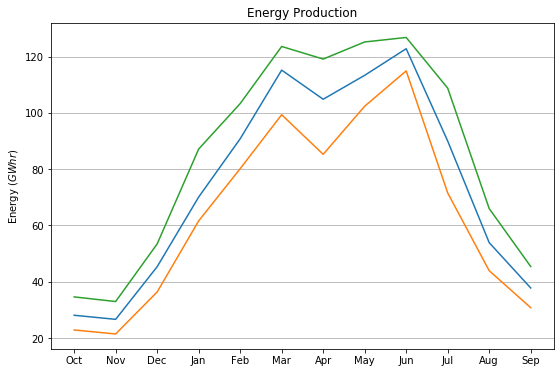

In [232]:
plt.figure(figsize=(9,6))
plt.ylabel(r'Energy $(GWhr)$')
plt.title('Energy Production')
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.plot(calmonthly['MonthName'],calmonthly['Energy_median'])
plt.plot(calmonthly_ps['MonthName'],calmonthly_ps['P75'])
plt.plot(calmonthly_ps['MonthName'],calmonthly_ps['P25'])


#plt.plot(yearly['YearDecimal'],yearly['Flow_mean'])
plt.show()

# Plot

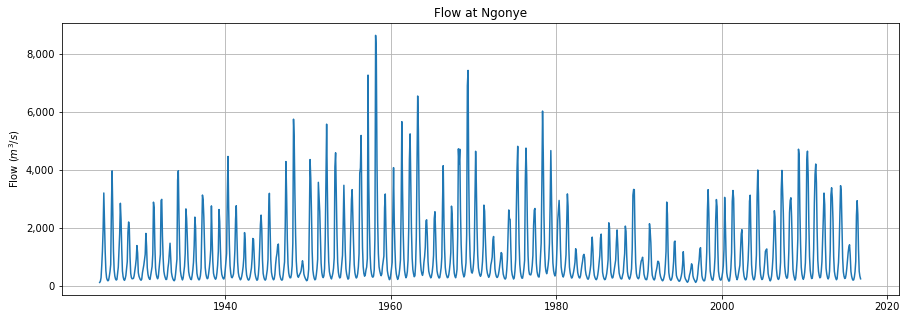

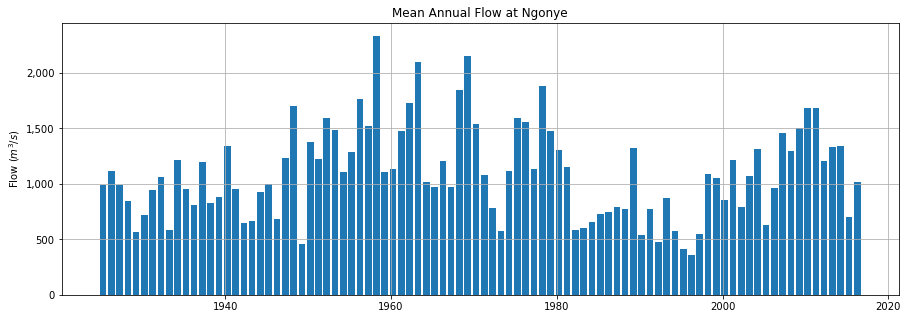

In [186]:
plt.figure(figsize=(15,5))
plt.ylabel(r'Flow $(m^3/s)$')
plt.title('Flow at Ngonye')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='both')
plt.plot(monthly['MonthDecimal'], monthly['Flow_mean'])
#plt.plot(yearly['YearDecimal'],yearly['Flow_mean'])
plt.show()

plt.figure(figsize=(15,5))
plt.ylabel(r'Flow $(m^3/s)$')
plt.title('Mean Annual Flow at Ngonye')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='both')
plt.bar(yearly['YearDecimal'],yearly['Flow_mean'])
plt.show()

